In [1]:
!nvidia-smi

Mon Apr 15 04:15:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import zipfile
import os

# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/archive (5).zip'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/YOLO')


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [5]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.23M/6.23M [00:00<00:00, 21.6MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 5.08MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 15.8ms
Speed: 0.6ms pre-process, 15.8ms inference, 48.7ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/YOLO

/content/drive/MyDrive/YOLO


In [8]:
!ls


 data.yaml   test   train  'Yolov8_object_detection_on_custom_dataset (1).ipynb'


In [9]:


%cd /content/drive/MyDrive/YOLO

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=5 imgsz=224 plots=True

/content/drive/MyDrive/YOLO
100% 21.5M/21.5M [00:00<00:00, 178MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=5, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=F

%cd /content/drive/MyDrive/YOLO

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=20 imgsz=224 plots=True

In [10]:
!ls runs/detect/train/

args.yaml					    results.csv		   val_batch1_labels.jpg
confusion_matrix.png				    results.png		   val_batch1_pred.jpg
events.out.tfevents.1713155711.609458a4f5d8.5644.0  train_batch0.jpg	   val_batch2_labels.jpg
F1_curve.png					    train_batch1.jpg	   val_batch2_pred.jpg
P_curve.png					    train_batch2.jpg	   weights
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg


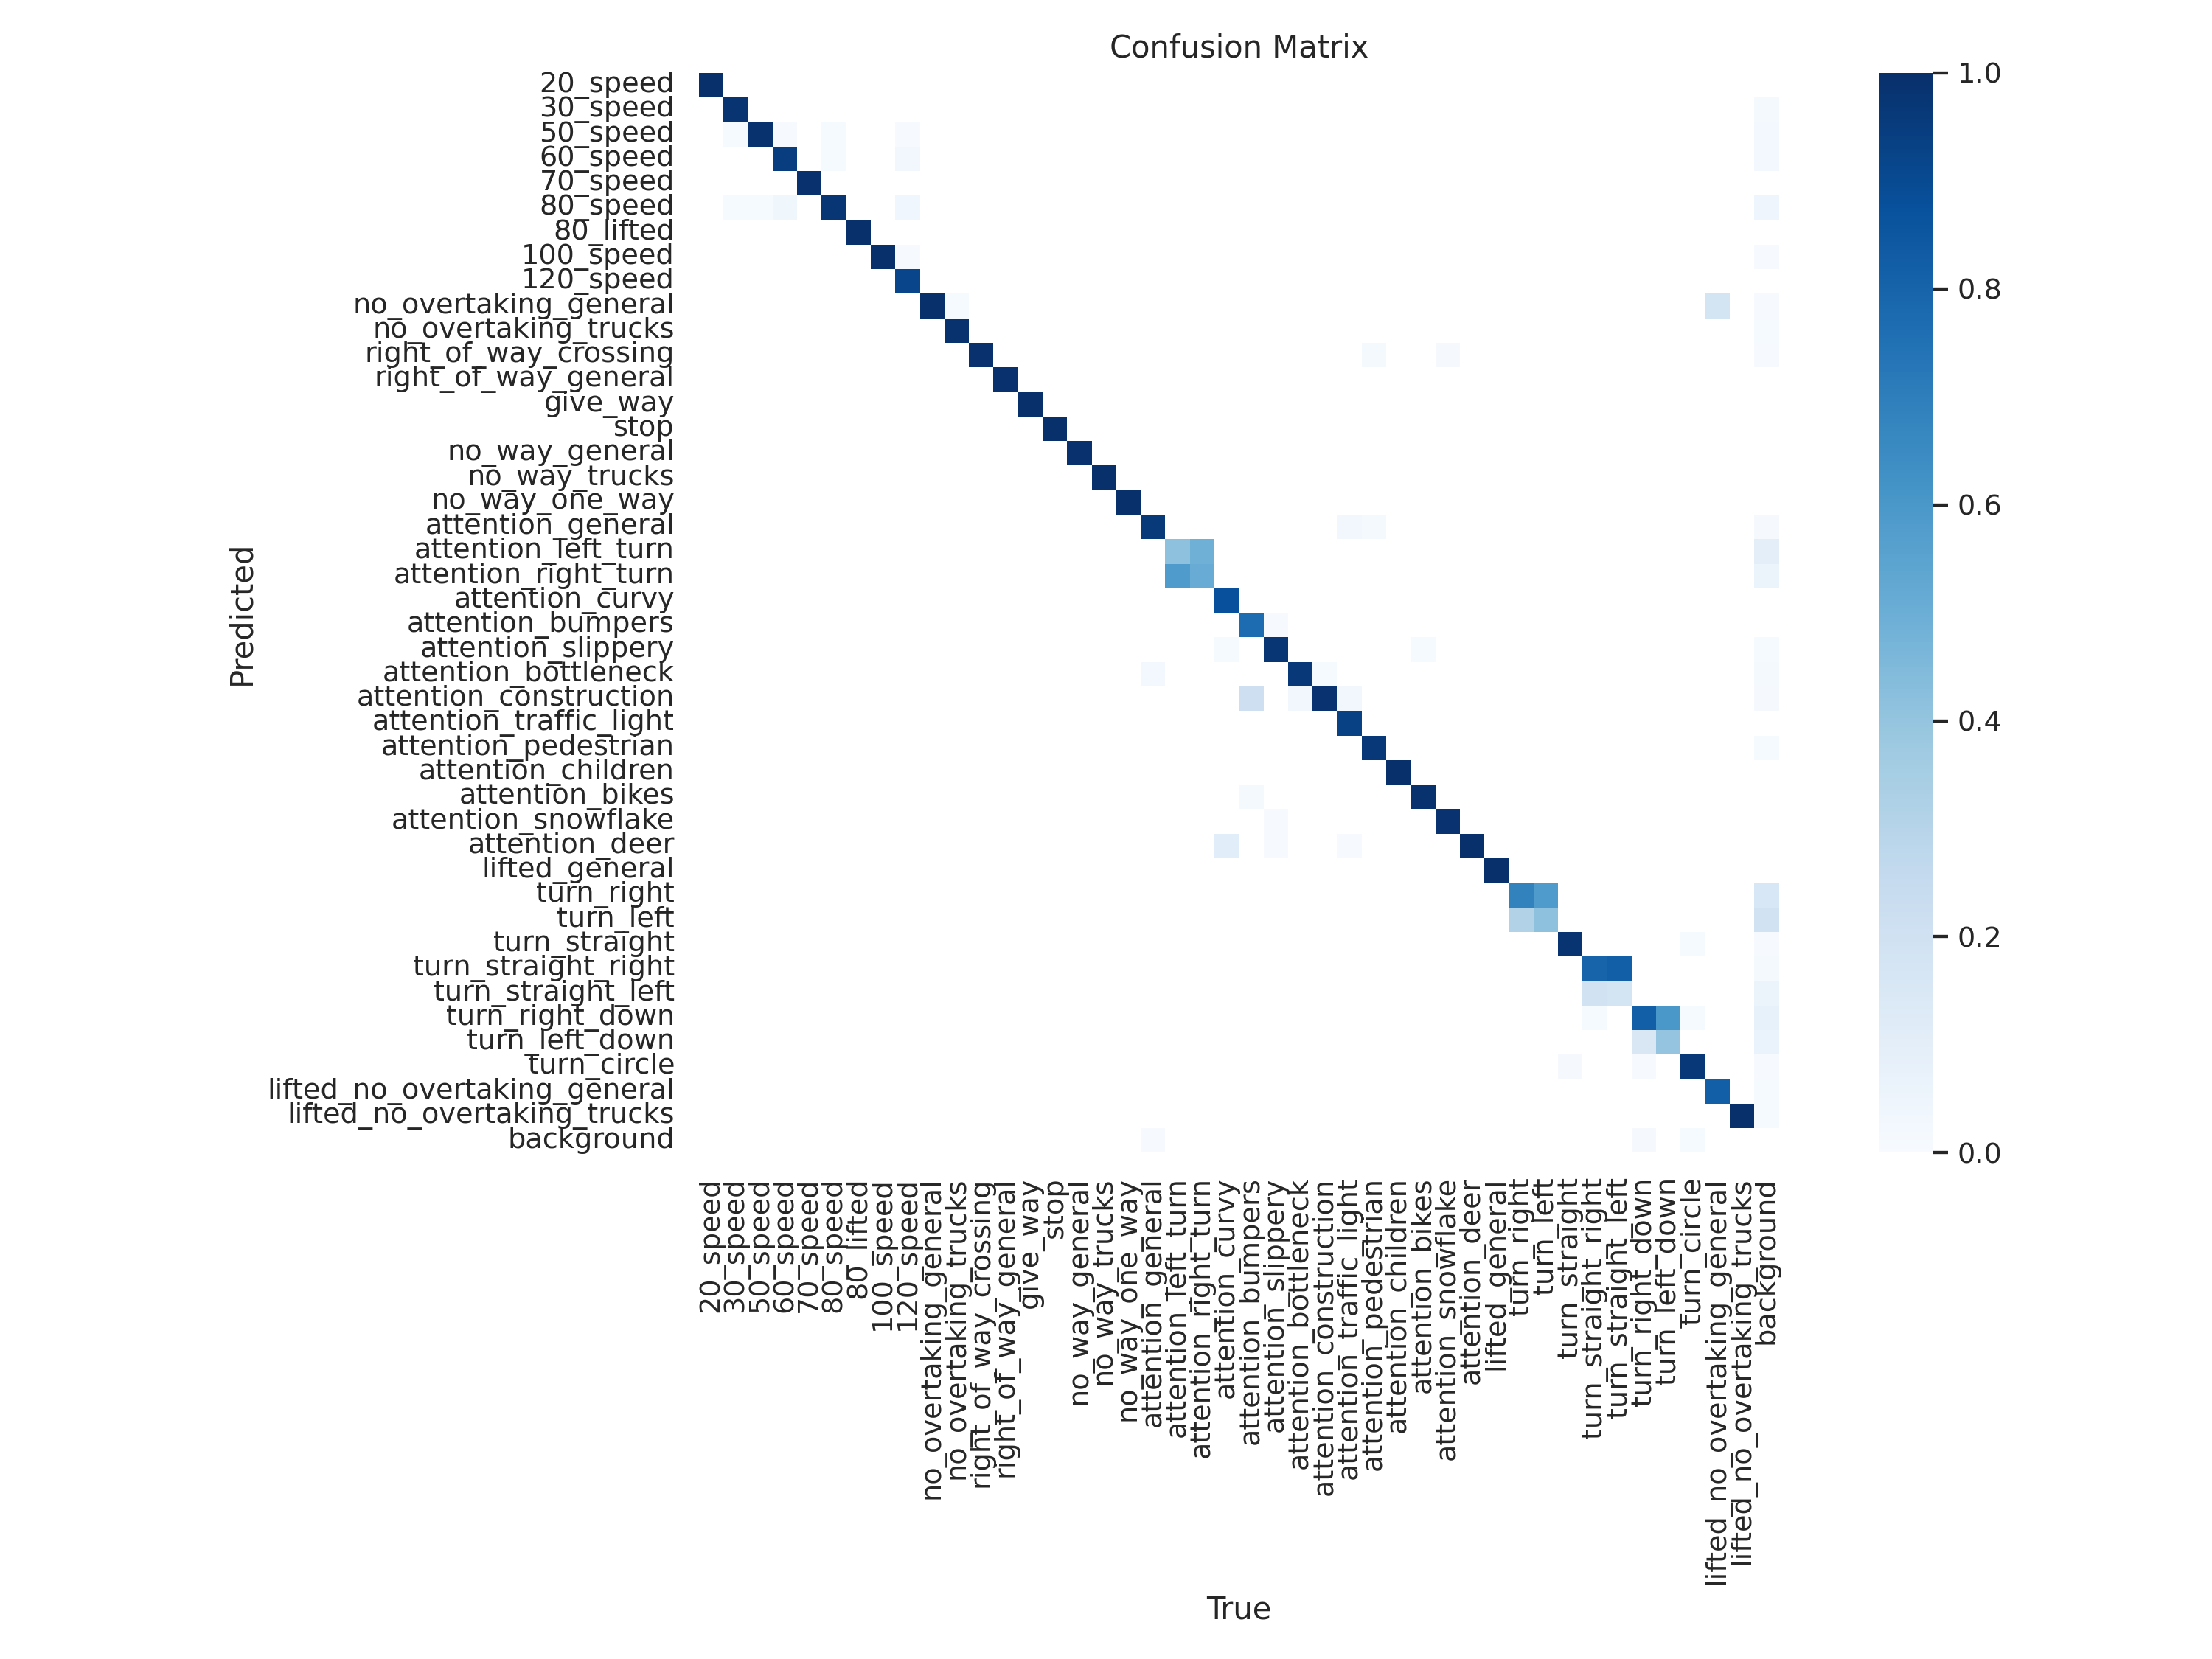

In [12]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

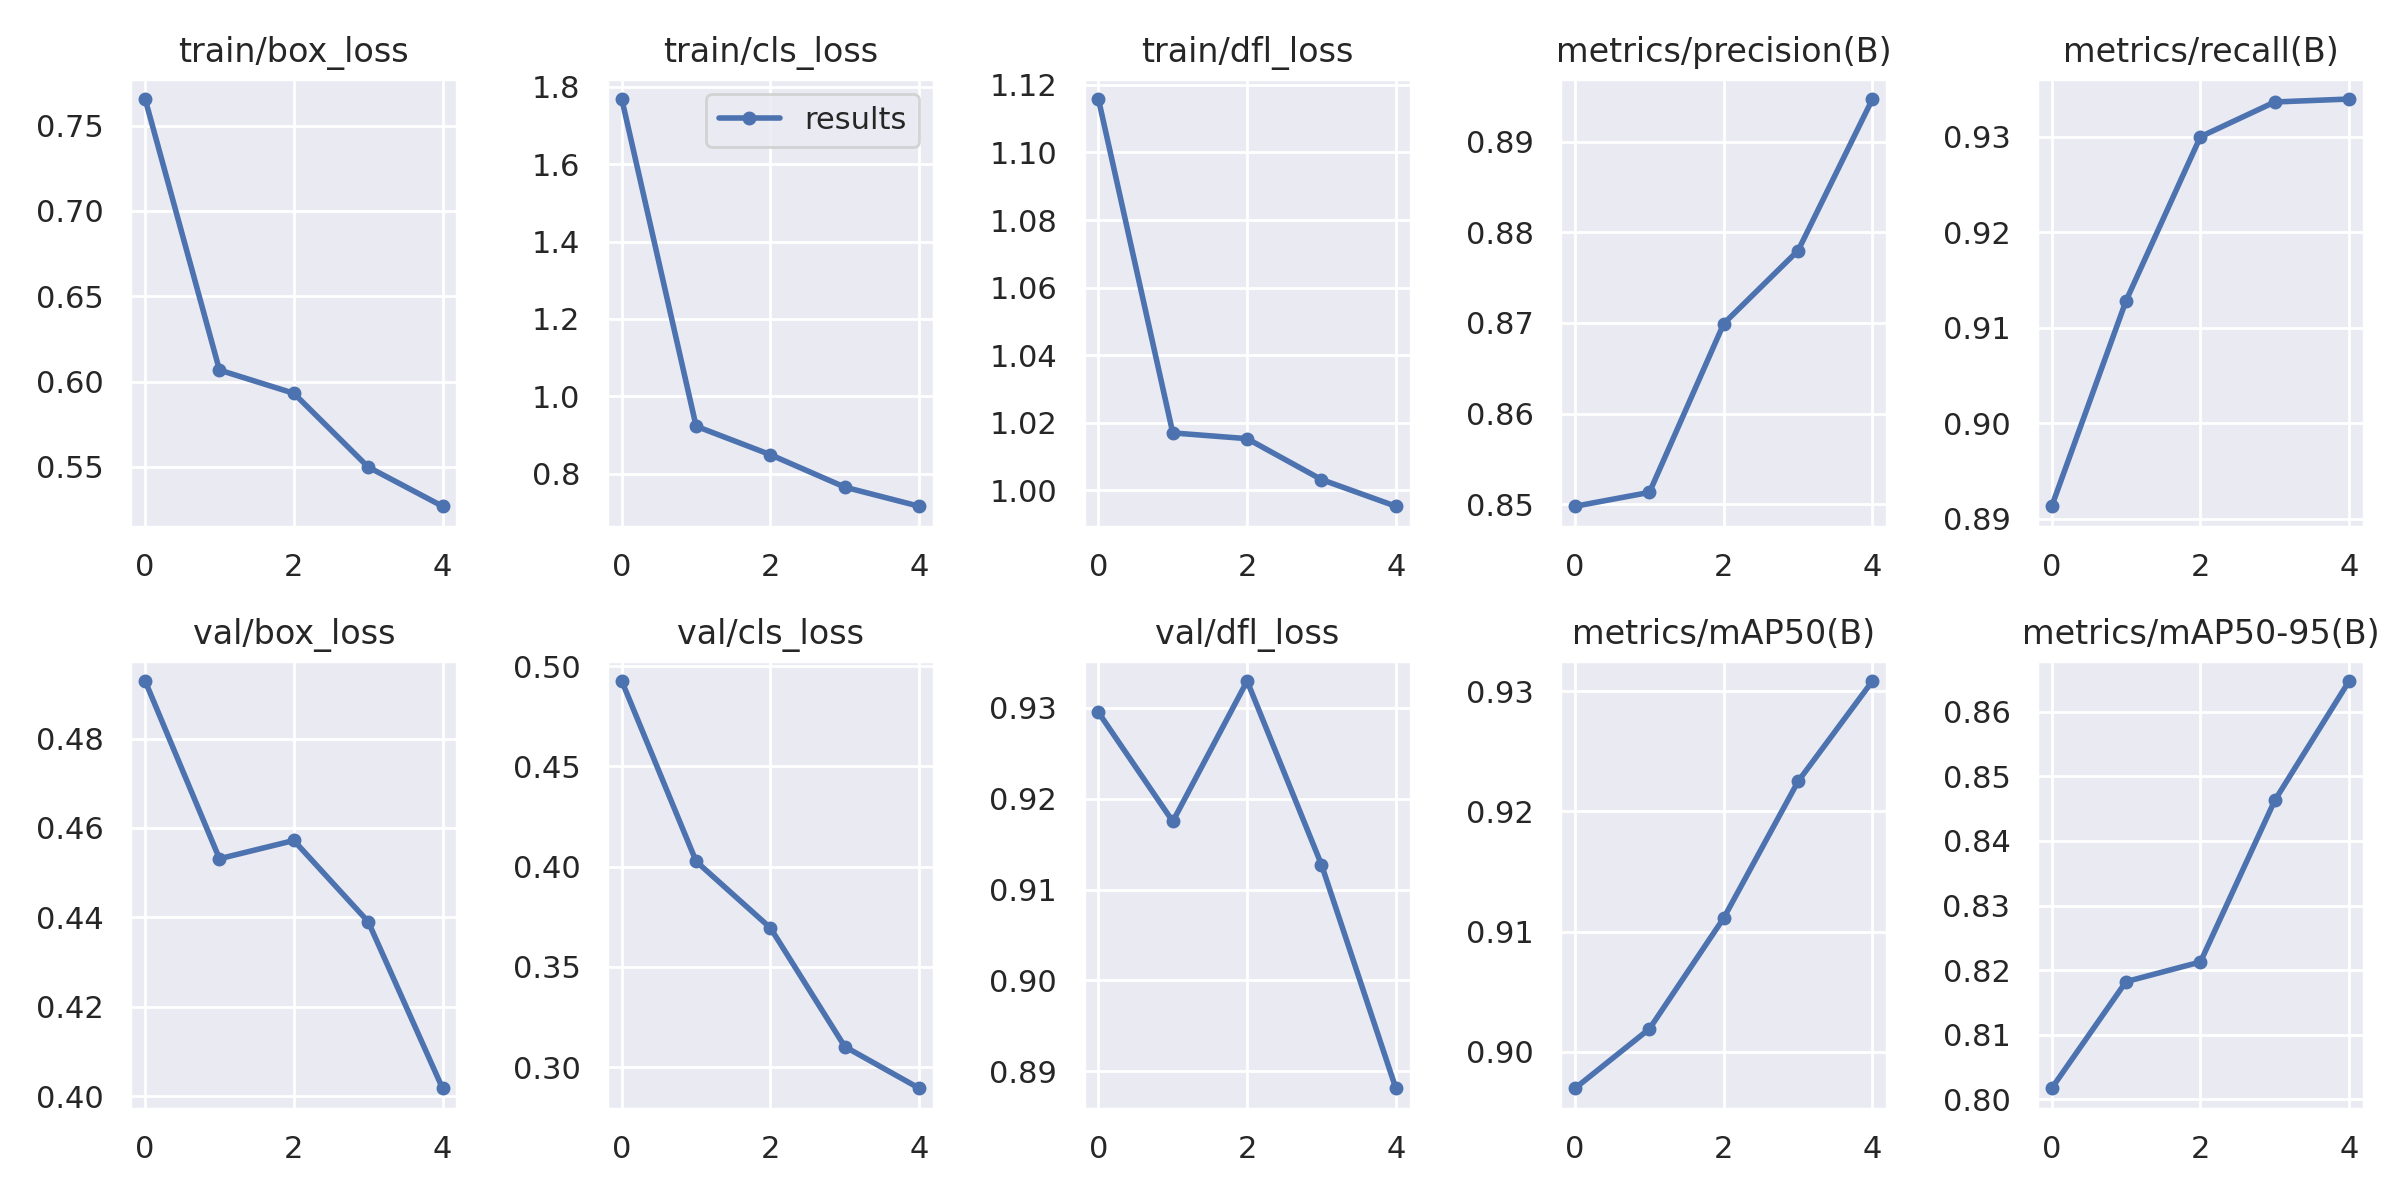

In [13]:
Image(filename='runs/detect/train/results.png', width=600)

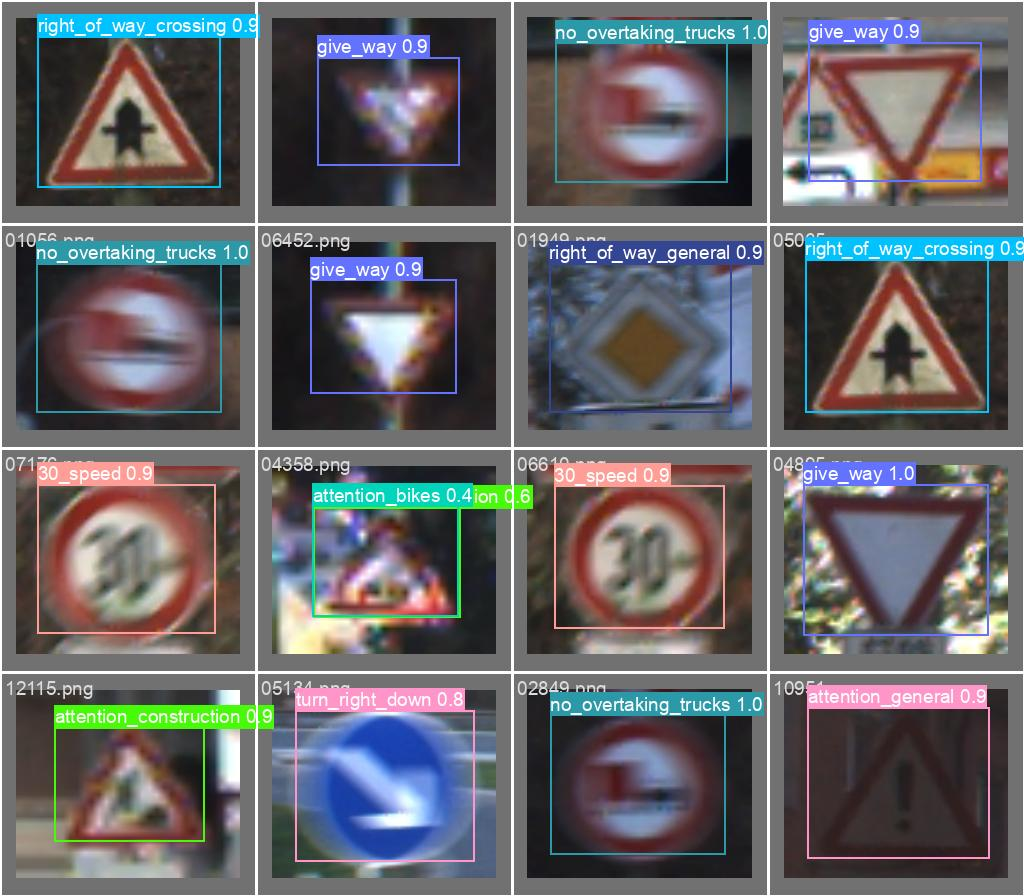

In [14]:
Image(filename='runs/detect/train/val_batch2_pred.jpg', width=600)

## Validate Custom Model

In [15]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

2024-04-15 06:29:25.384648: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 06:29:25.384705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 06:29:25.386812: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 06:29:26.914179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11142225 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/MyDrive/YOLO/test/labels.cache... 12630 imag

## Inference with Custom Model

In [16]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=test/images

Streaming output truncated to the last 5000 lines.
image 6263/12630 /content/drive/MyDrive/YOLO/test/images/06262.png: 224x224 1 70_speed, 9.3ms
image 6264/12630 /content/drive/MyDrive/YOLO/test/images/06263.png: 224x224 1 60_speed, 9.0ms
image 6265/12630 /content/drive/MyDrive/YOLO/test/images/06264.png: 224x224 1 attention_deer, 13.1ms
image 6266/12630 /content/drive/MyDrive/YOLO/test/images/06265.png: 224x224 1 turn_right_down, 9.3ms
image 6267/12630 /content/drive/MyDrive/YOLO/test/images/06266.png: 224x224 1 attention_general, 9.3ms
image 6268/12630 /content/drive/MyDrive/YOLO/test/images/06267.png: 224x224 1 turn_circle, 9.1ms
image 6269/12630 /content/drive/MyDrive/YOLO/test/images/06268.png: 224x224 1 turn_straight, 9.2ms
image 6270/12630 /content/drive/MyDrive/YOLO/test/images/06269.png: 224x224 1 attention_slippery, 8.8ms
image 6271/12630 /content/drive/MyDrive/YOLO/test/images/06270.png: 224x224 1 turn_straight, 9.4ms
image 6272/12630 /content/drive/MyDrive/YOLO/test/images/

**NOTE:** Let's take a look at few results.

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/content/test2.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")